In [ ]:
#Importar librerias y CSV
import pandas as pd
df = pd.read_csv('/content/conjunto_de_datos_defunciones_registradas_2023.csv')
df.head()


,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,...,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,15,1,32,44,5,1,1,1,...,9,18,12,2022,NaN,88,888,8888,0,999
1,1,1,15,1,1,1,15,1,1,1,...,9,12,12,2022,NaN,88,888,8888,0,999
2,1,1,15,1,1,1,15,1,1,1,...,9,17,12,2022,NaN,88,888,8888,0,999
3,1,1,15,1,1,1,15,1,1,1,...,9,1,1,2023,NaN,88,888,8888,0,999
4,1,1,15,1,14,53,1,7777,1,1,...,8,22,12,2022,NaN,88,888,8888,0,999


In [ ]:
#Dejar unicamente los registros relacionados al suicidio
df = df[df['causa_def'].str.startswith(('X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69',
                                        'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79',
                                        'X80', 'X81', 'X82', 'X83', 'X84'))]


In [ ]:
#Eliminar columnas no relevantes para nuestro caso
columnas_a_eliminar = ['ent_regis', 'mun_regis', 'tloc_regis', 'loc_regis', 'mun_resid', 'tloc_resid', 'loc_resid', 'mun_ocurr','tloc_ocurr', 'loc_ocurr', 'lista_mex', 'ent_nac', 'lengua', 'cve_lengua', 'nacionalid', 'nacesp_cve', 'sem_gest', 'gramos', 'dia_ocurr', 'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_nacim', 'mes_nacim', 'anio_nacim', 'ocurr_trab', 'lugar_ocur', 'lugar_ocur', 'par_agre', 'vio_fami', 'asist_medi', 'cirugia', 'natviole', 'necropsia', 'usonecrops', 'encefalica', 'donador', 'cond_cert', 'embarazo', 'rel_emba', 'horas', 'minutos', 'edad agru', 'complicaro', 'dia_cert', 'mes cert', 'anio_cert', 'maternas', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m', 'dis_re_oax', 'edad_agru', 'mes_cert', 'capitulo', 'grupo', 'lista1', 'gr_lismex']

df = df.drop(columns=columnas_a_eliminar, errors='ignore')
df.head()

,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,sitio_ocur,derechohab,area_ur
620,1,1,X709,T71X,1,2,2,4026,3,1,998,6,1,3,12,2,2
732,1,1,X709,T71X,2,2,2,4030,1,1,998,6,1,3,1,1,2
791,1,1,X700,T71X,1,2,2,4015,1,1,79,3,1,3,11,1,1
793,1,1,X700,T71X,2,2,2,4034,2,1,23,10,2,3,11,3,1
798,1,1,X700,T71X,1,2,2,4022,3,1,998,6,1,3,11,1,1


In [ ]:
df['edad'] = df['edad'].astype(str)
df.loc[df['edad'] == '4998', 'edad'] = 'No especificado'
df['edad'] = df['edad'].str.lstrip('4')
df['edad'] = df['edad'].str.lstrip('0')
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,sitio_ocur,derechohab,area_ur
620,1,1,X709,T71X,1,2,2,26,3,1,998,6,1,3,12,2,2
732,1,1,X709,T71X,2,2,2,30,1,1,998,6,1,3,1,1,2
791,1,1,X700,T71X,1,2,2,15,1,1,79,3,1,3,11,1,1
793,1,1,X700,T71X,2,2,2,34,2,1,23,10,2,3,11,3,1
798,1,1,X700,T71X,1,2,2,22,3,1,998,6,1,3,11,1,1


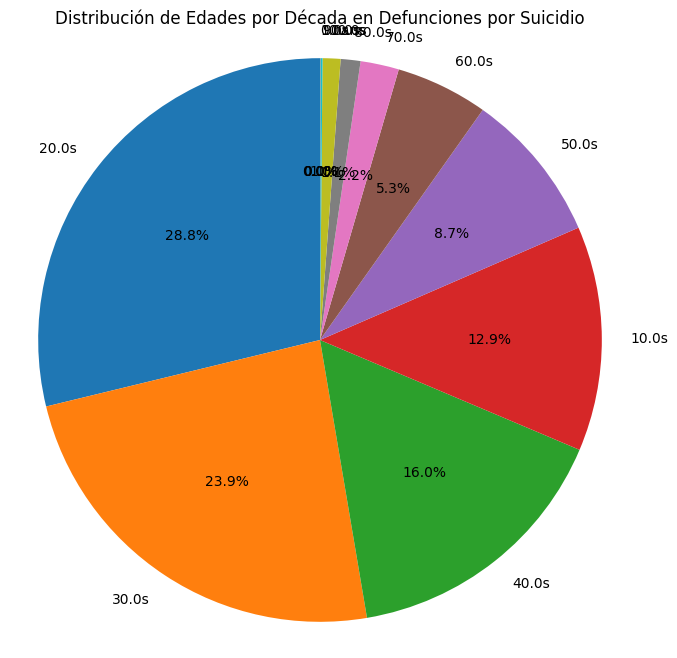

Porcentajes por década:


,count
Decada,
20.0s,28.791887
30.0s,23.875661
40.0s,15.961199
10.0s,12.896825
50.0s,8.675044
60.0s,5.291005
70.0s,2.204586
80.0s,1.135362
nans,1.025132


In [ ]:
# prompt: Haz una grafica de pastel de las edades, agrupandolas por decadas pero mostrando los porcentajes en una lista aparte

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and processed as in the previous code

# Group ages by decades
df['edad'] = pd.to_numeric(df['edad'], errors='coerce') # Convert to numeric, handling errors
df['Decada'] = (df['edad'] // 10) * 10
df['Decada'] = df['Decada'].astype(str) + 's'
decades = df['Decada'].value_counts()

# Calculate percentages
percentages = (decades / decades.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(decades, labels=decades.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Edades por Década en Defunciones por Suicidio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print percentages in a separate list
print("Porcentajes por década:")
percentages


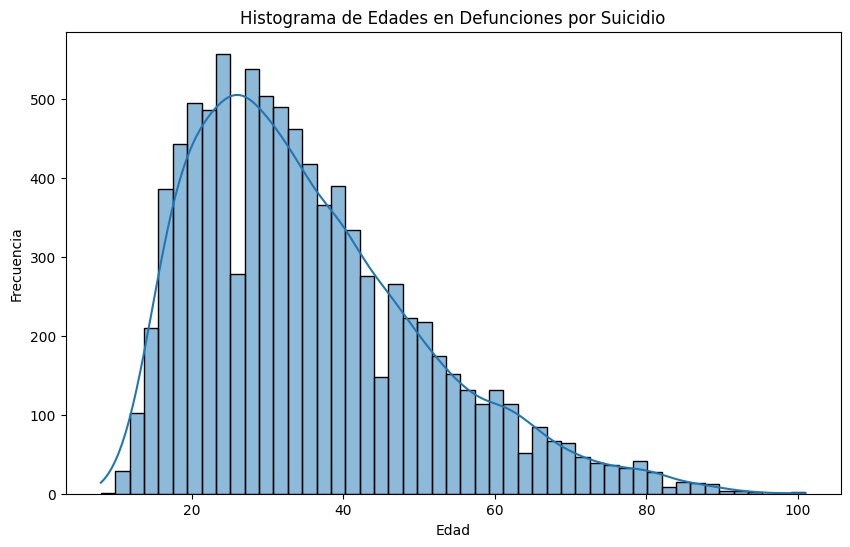

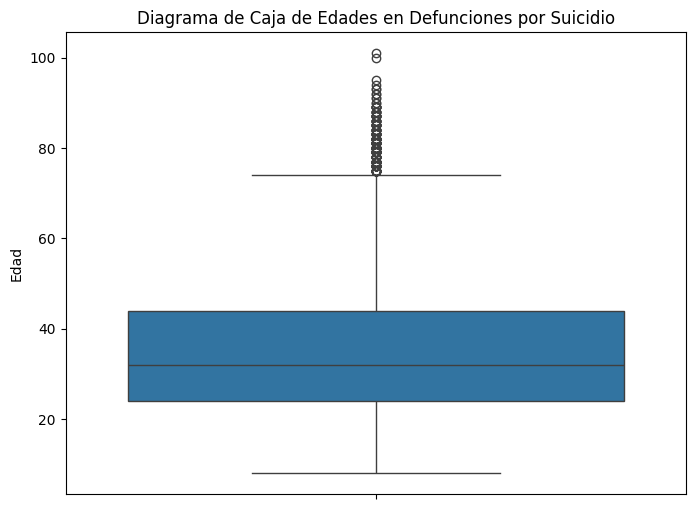

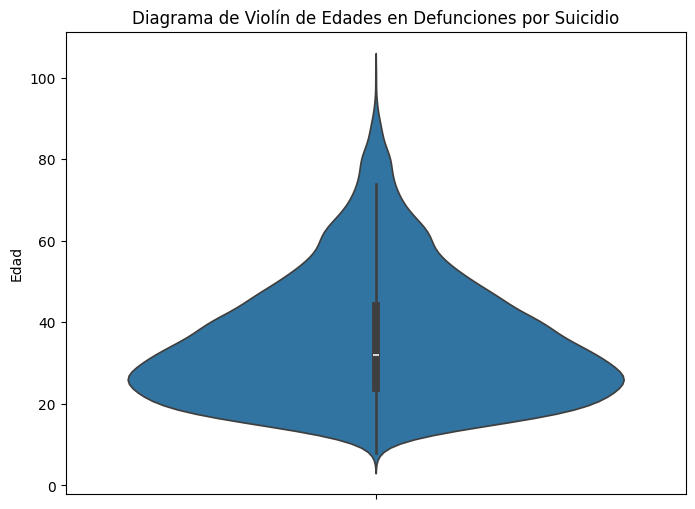

In [ ]:
# prompt: Crear varios tipos de graficas de las edades

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], kde=True)
plt.title('Histograma de Edades en Defunciones por Suicidio')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['edad'])
plt.title('Diagrama de Caja de Edades en Defunciones por Suicidio')
plt.ylabel('Edad')
plt.show()


# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['edad'])
plt.title('Diagrama de Violín de Edades en Defunciones por Suicidio')
plt.ylabel('Edad')
plt.show()


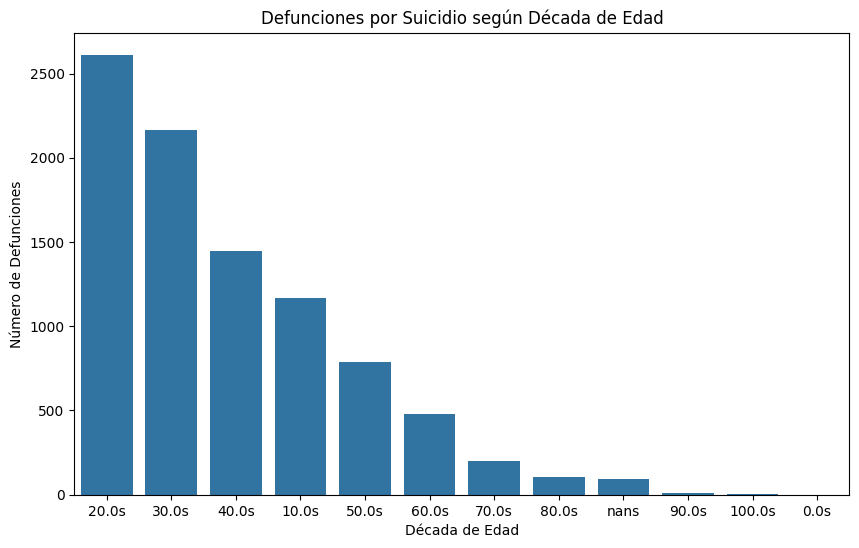

Porcentajes por década:


,count
Decada,
20.0s,28.791887
30.0s,23.875661
40.0s,15.961199
10.0s,12.896825
50.0s,8.675044
60.0s,5.291005
70.0s,2.204586
80.0s,1.135362
nans,1.025132


In [ ]:
# prompt: Crear un diagrama de defunciones por suicidio segun edad

# Assuming df is already loaded and processed as in the previous code

# Group ages by decades
df['edad'] = pd.to_numeric(df['edad'], errors='coerce') # Convert to numeric, handling errors
df['Decada'] = (df['edad'] // 10) * 10
df['Decada'] = df['Decada'].astype(str) + 's'
decades = df['Decada'].value_counts()

# Calculate percentages
percentages = (decades / decades.sum()) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=decades.index, y=decades.values)
plt.title('Defunciones por Suicidio según Década de Edad')
plt.xlabel('Década de Edad')
plt.ylabel('Número de Defunciones')
plt.show()

# Print percentages in a separate list
print("Porcentajes por década:")
percentages


In [ ]:
# prompt: Crear una nueva columna para sexo donde tenga los valores {1: 'Hombre', 2: 'Mujer', 9: 'No especificado'}

# Create the mapping dictionary
sexo_mapping = {1: 'Hombre', 2: 'Mujer', 9: 'No especificado'}

# Use the map function to create the new column
df['sexo_texto'] = df['sexo'].map(sexo_mapping)

# Display the first few rows to verify the new column
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,sitio_ocur,derechohab,area_ur,Decada,sexo_texto
620,1,1,X709,T71X,1,2,2,26.0,3,1,998,6,1,3,12,2,2,20.0s,Hombre
732,1,1,X709,T71X,2,2,2,30.0,1,1,998,6,1,3,1,1,2,30.0s,Mujer
791,1,1,X700,T71X,1,2,2,15.0,1,1,79,3,1,3,11,1,1,10.0s,Hombre
793,1,1,X700,T71X,2,2,2,34.0,2,1,23,10,2,3,11,3,1,30.0s,Mujer
798,1,1,X700,T71X,1,2,2,22.0,3,1,998,6,1,3,11,1,1,20.0s,Hombre


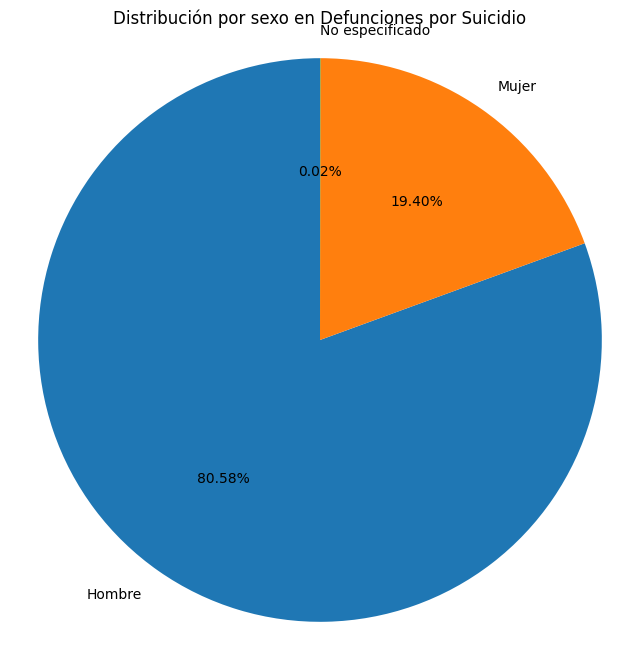

Porcentajes por sexo:
sexo_texto
Hombre             80.58
Mujer              19.40
No especificado     0.02
Name: count, dtype: float64


In [ ]:
# prompt: Generar una grafica de pastel con los valores de la columna sexo_texto y su porcentaje con 2 digitos despues del punto

import matplotlib.pyplot as plt

# Calculate the value counts and percentages
sexo_counts = df['sexo_texto'].value_counts()
sexo_percentages = (sexo_counts / sexo_counts.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribución por sexo en Defunciones por Suicidio')
plt.axis('equal')
plt.show()

# Print the percentages
print("Porcentajes por sexo:")
print(sexo_percentages.round(2))


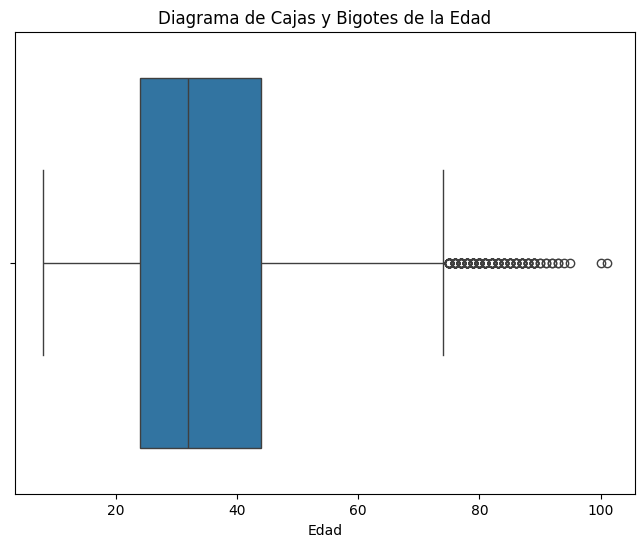

In [ ]:
# prompt: Haz un diagrama de cajas y bigotes de la edad

import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['edad'])
plt.title('Diagrama de Cajas y Bigotes de la Edad')
plt.xlabel('Edad')
plt.show()


In [ ]:
entidad_catalog = pd.read_csv('/content/catalogos/entidad.csv')
df = pd.merge(df, entidad_catalog, left_on='ent_resid', right_on='codigo', how='left', suffixes=('', '_resid'))
df = pd.merge(df, entidad_catalog, left_on='ent_ocurr', right_on='codigo', how='left', suffixes=('', '_ocurr'))
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,tipo_defun,sitio_ocur,derechohab,area_ur,Decada,sexo_texto,codigo,entidad,codigo_ocurr,entidad_ocurr
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,3,12,2,2,20.0s,Hombre,1,Aguascalientes,1,Aguascalientes
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,3,1,1,2,30.0s,Mujer,1,Aguascalientes,1,Aguascalientes
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,3,11,1,1,10.0s,Hombre,1,Aguascalientes,1,Aguascalientes
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,3,11,3,1,30.0s,Mujer,1,Aguascalientes,1,Aguascalientes
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,3,11,1,1,20.0s,Hombre,1,Aguascalientes,1,Aguascalientes


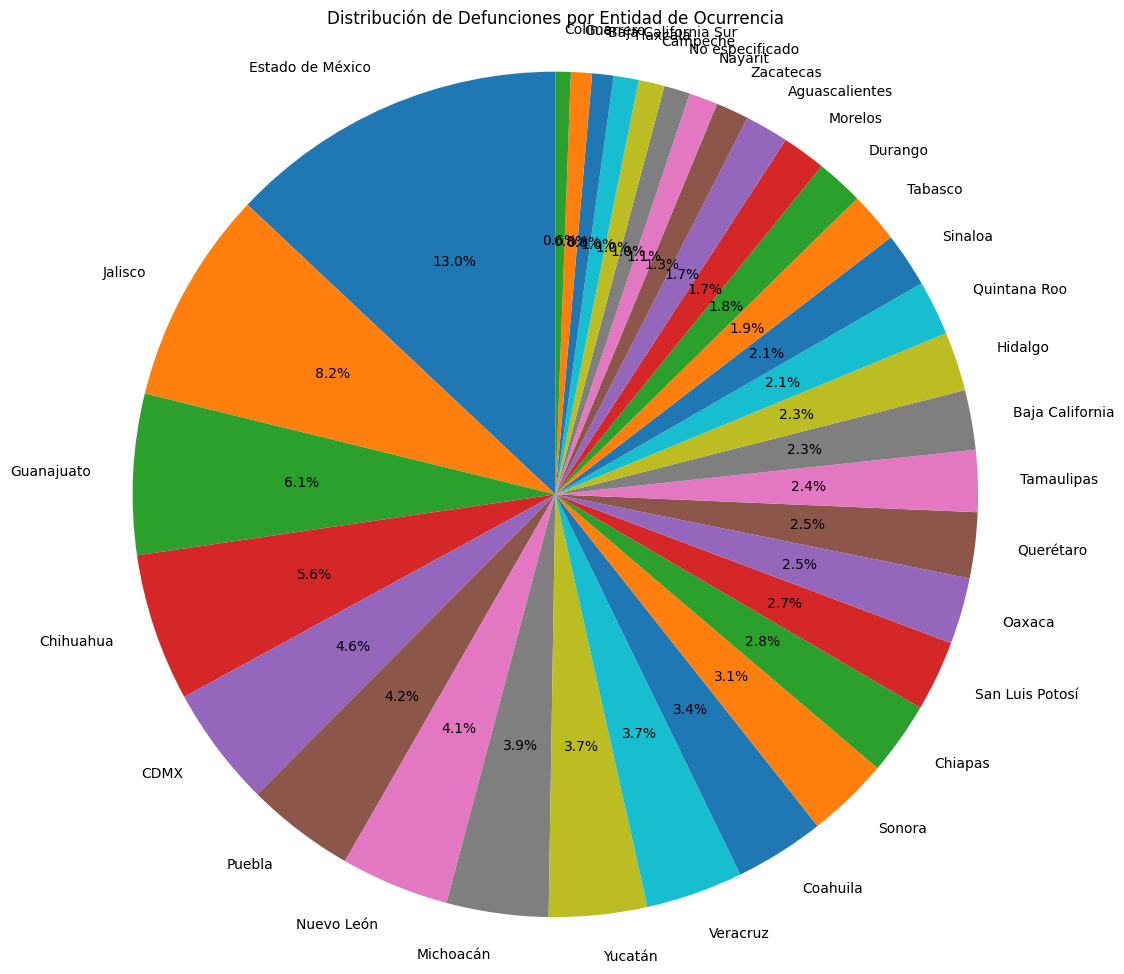

In [ ]:
# prompt: Hacer una grafica de pastel de la columna entidad_ocurr

# Assuming df is already loaded and processed as in the previous code
import matplotlib.pyplot as plt

# Count occurrences of each entity
entidad_ocurr_counts = df['entidad_ocurr'].value_counts()

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(entidad_ocurr_counts, labels=entidad_ocurr_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Defunciones por Entidad de Ocurrencia')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


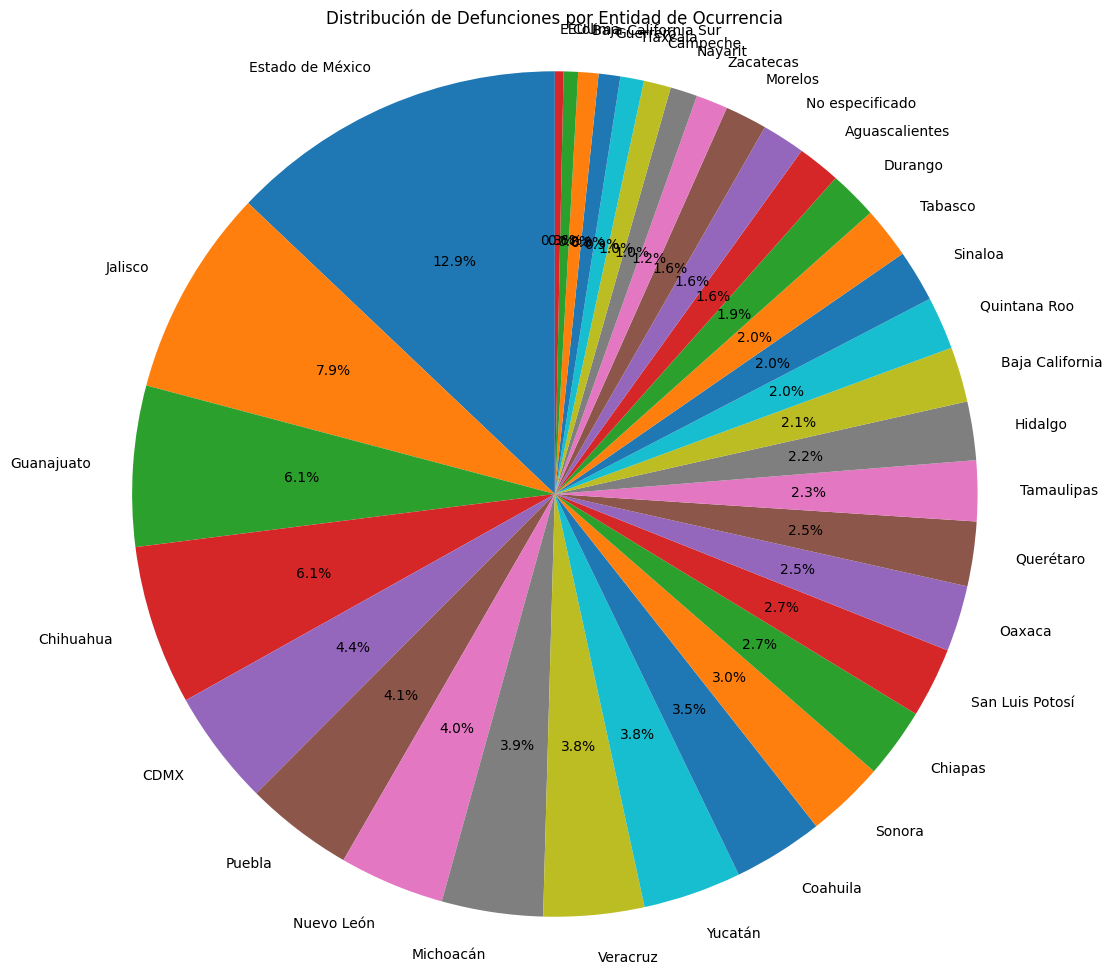

In [ ]:
# prompt: Hacer una grafica de pastel de la columna entidad_ocurr

# Assuming df is already loaded and processed as in the previous code
import matplotlib.pyplot as plt

# Count occurrences of each entity
entidad_ocurr_counts = df['entidad'].value_counts()

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(entidad_ocurr_counts, labels=entidad_ocurr_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Defunciones por Entidad de Ocurrencia')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# prompt: Crear una nueva columna para sexo donde tenga los valores {1: 'Hombre', 2: 'Mujer', 9: 'No especificado'}

# Create the mapping dictionary
area_ur_mapping = {1: 'Urbana', 2: 'Rural', 9: 'No especificado'}

# Use the map function to create the new column
df['area_ur_texto'] = df['area_ur'].map(area_ur_mapping)

# Display the first few rows to verify the new column
df.head()

,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,sitio_ocur,derechohab,area_ur,Decada,sexo_texto,codigo,entidad,codigo_ocurr,entidad_ocurr,area_ur_texto
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,12,2,2,20.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Rural
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,1,1,2,30.0s,Mujer,1,Aguascalientes,1,Aguascalientes,Rural
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,11,1,1,10.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Urbana
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,11,3,1,30.0s,Mujer,1,Aguascalientes,1,Aguascalientes,Urbana
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,11,1,1,20.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Urbana


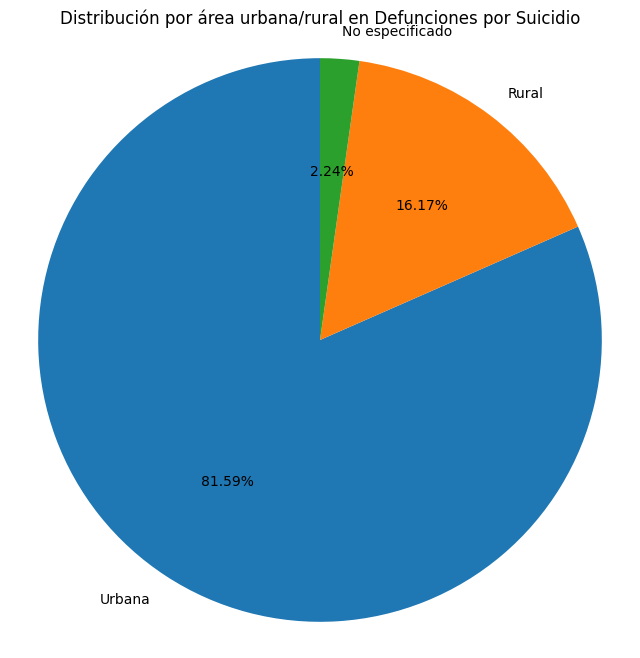

Porcentajes por área urbana/rural:
area_ur_texto
Urbana             81.59
Rural              16.17
No especificado     2.24
Name: count, dtype: float64


In [ ]:
# prompt: Hacer una grafica de pastel del campo 'area_ur_texto'

# Calculate the value counts and percentages
area_ur_counts = df['area_ur_texto'].value_counts()
area_ur_percentages = (area_ur_counts / area_ur_counts.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(area_ur_counts, labels=area_ur_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribución por área urbana/rural en Defunciones por Suicidio')
plt.axis('equal')
plt.show()

# Print the percentages
print("Porcentajes por área urbana/rural:")
print(area_ur_percentages.round(2))


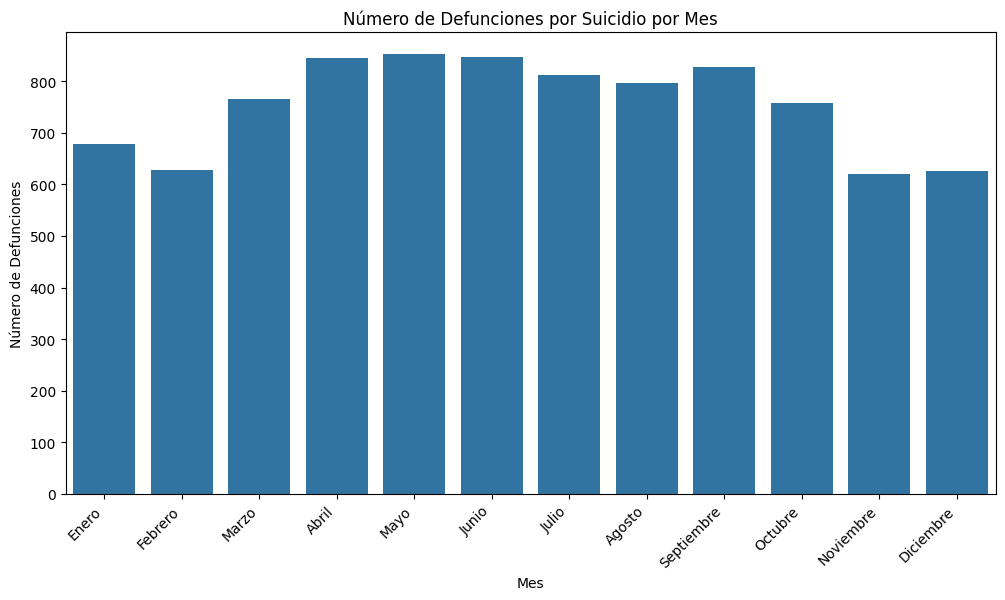

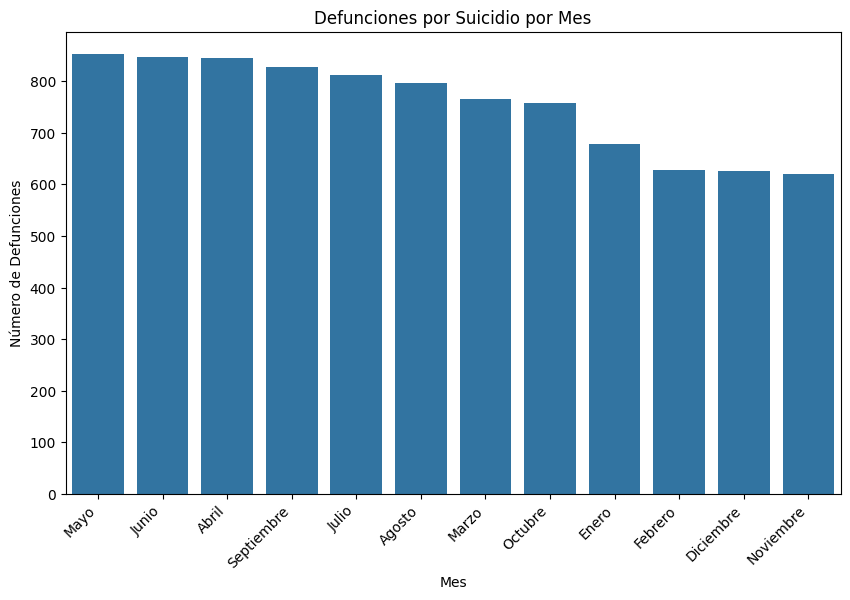

In [ ]:
# prompt: Hacer varias graficas del campo 'mes_ocurr' usando el nombre del mes en Espanol

# Create the mapping dictionary for month names
month_mapping = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Map the month numbers to Spanish month names
df['mes_ocurr_espanol'] = df['mes_ocurr'].map(month_mapping)

# Now you can create various plots using the 'mes_ocurr_espanol' column
# Example: Countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='mes_ocurr_espanol', data=df, order=month_mapping.values()) # Order months correctly
plt.title('Número de Defunciones por Suicidio por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Defunciones')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

# Example: Bar plot
mes_counts = df['mes_ocurr_espanol'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=mes_counts.index, y=mes_counts.values)
plt.title('Defunciones por Suicidio por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Defunciones')
plt.xticks(rotation=45, ha='right')
plt.show()


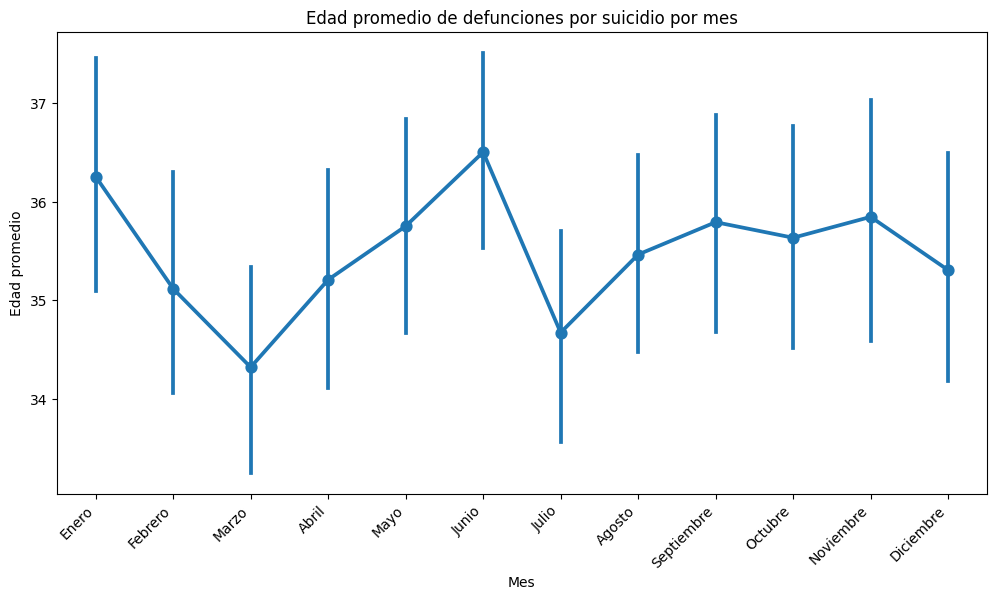

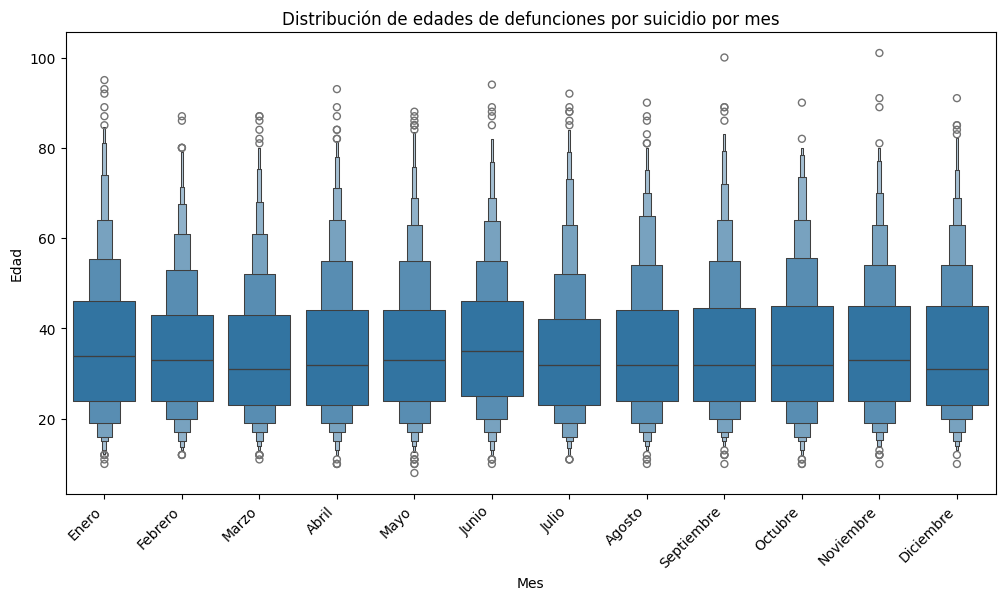

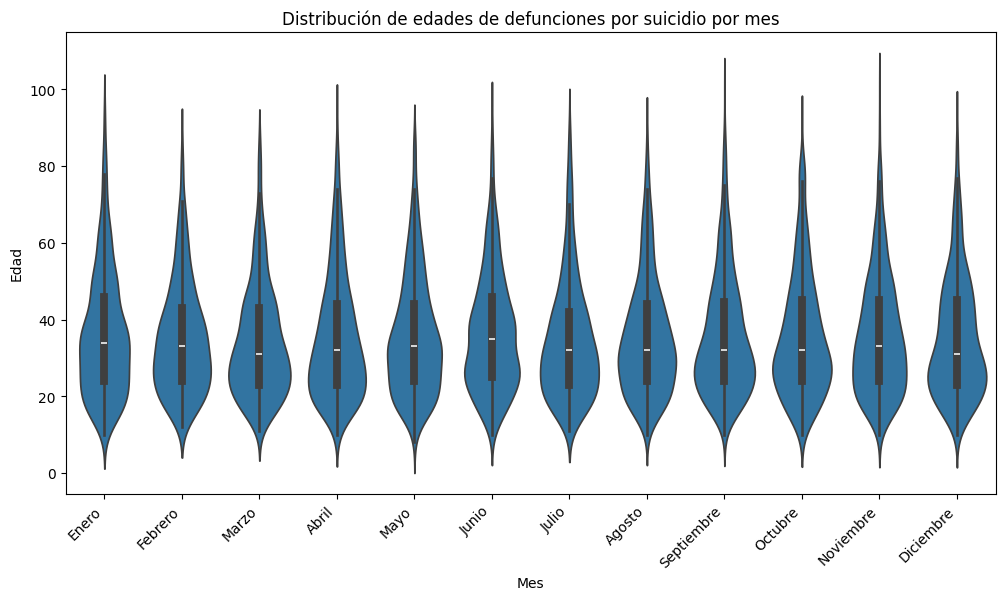

In [ ]:
# prompt: Hacer varias graficas del campo 'mes_ocurr' usando el nombre del mes en Espanol

# Assuming df is already loaded and processed as in the previous code

# Create the mapping dictionary for month names (already done in previous code)
# month_mapping = {
#     1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
#     7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
# }

# df['mes_ocurr_espanol'] = df['mes_ocurr'].map(month_mapping)


# Example: Point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='mes_ocurr_espanol', y='edad', data=df, order=month_mapping.values())
plt.title('Edad promedio de defunciones por suicidio por mes')
plt.xlabel('Mes')
plt.ylabel('Edad promedio')
plt.xticks(rotation=45, ha='right')
plt.show()


# Example: Boxen plot
plt.figure(figsize=(12, 6))
sns.boxenplot(x='mes_ocurr_espanol', y='edad', data=df, order=month_mapping.values())
plt.title('Distribución de edades de defunciones por suicidio por mes')
plt.xlabel('Mes')
plt.ylabel('Edad')
plt.xticks(rotation=45, ha='right')
plt.show()


# Example: Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='mes_ocurr_espanol', y='edad', data=df, order=month_mapping.values())
plt.title('Distribución de edades de defunciones por suicidio por mes')
plt.xlabel('Mes')
plt.ylabel('Edad')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# prompt: Crear una nueva columna llamada afromexicano, basada en la columna afromex, con los valores 1 = 'Si', 2 = 'No', 8 = 'No aplica' y 9 = 'No especificado'

# Create the mapping dictionary
afromexicano_mapping = {1: 'Sí', 2: 'No', 8: 'No aplica', 9: 'No especificado'}

# Use the map function to create the new column, handling potential errors
df['afromexicano'] = df['afromex'].map(afromexicano_mapping).fillna('No especificado')

# Display the first few rows to verify the new column
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,area_ur,Decada,sexo_texto,codigo,entidad,codigo_ocurr,entidad_ocurr,area_ur_texto,mes_ocurr_espanol,afromexicano
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,2,20.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Rural,Marzo,No
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,2,30.0s,Mujer,1,Aguascalientes,1,Aguascalientes,Rural,Enero,No
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,1,10.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Urbana,Enero,No
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,1,30.0s,Mujer,1,Aguascalientes,1,Aguascalientes,Urbana,Febrero,No
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,1,20.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Urbana,Marzo,No


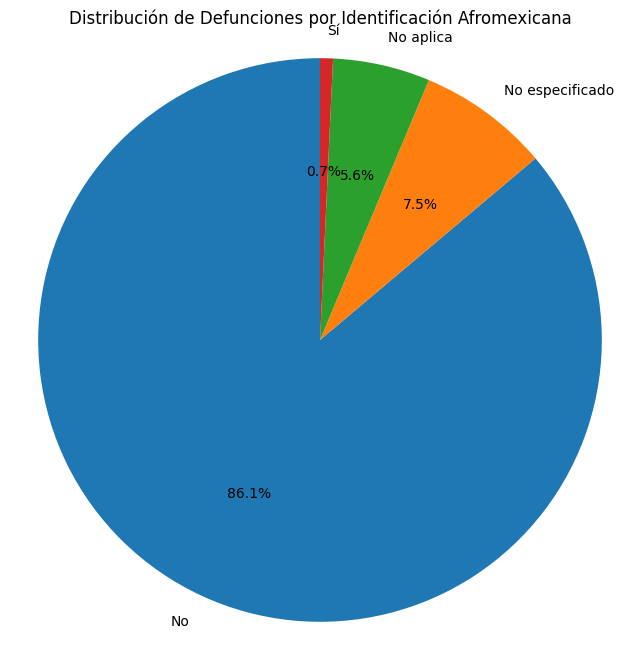

In [ ]:
# prompt: Hacer una grafica de pastel de la columna afromexicano

# Calculate the value counts for 'afromexicano'
afromexicano_counts = df['afromexicano'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(afromexicano_counts, labels=afromexicano_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Defunciones por Identificación Afromexicana')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# prompt: Crear una nueva columna llamada afromexicano, basada en la columna afromex, con los valores 1 = 'Si', 2 = 'No', 8 = 'No aplica' y 9 = 'No especificado'

# Create the mapping dictionary
indigena_mapping = {1: 'Sí', 2: 'No', 8: 'No aplica', 9: 'No especificado'}

# Use the map function to create the new column, handling potential errors
df['indigena'] = df['conindig'].map(indigena_mapping).fillna('No especificado')

# Display the first few rows to verify the new column
df.head()

,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,Decada,sexo_texto,codigo,entidad,codigo_ocurr,entidad_ocurr,area_ur_texto,mes_ocurr_espanol,afromexicano,indigena
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,20.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Rural,Marzo,No,No
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,30.0s,Mujer,1,Aguascalientes,1,Aguascalientes,Rural,Enero,No,No
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,10.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Urbana,Enero,No,No
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,30.0s,Mujer,1,Aguascalientes,1,Aguascalientes,Urbana,Febrero,No,No
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,20.0s,Hombre,1,Aguascalientes,1,Aguascalientes,Urbana,Marzo,No,No


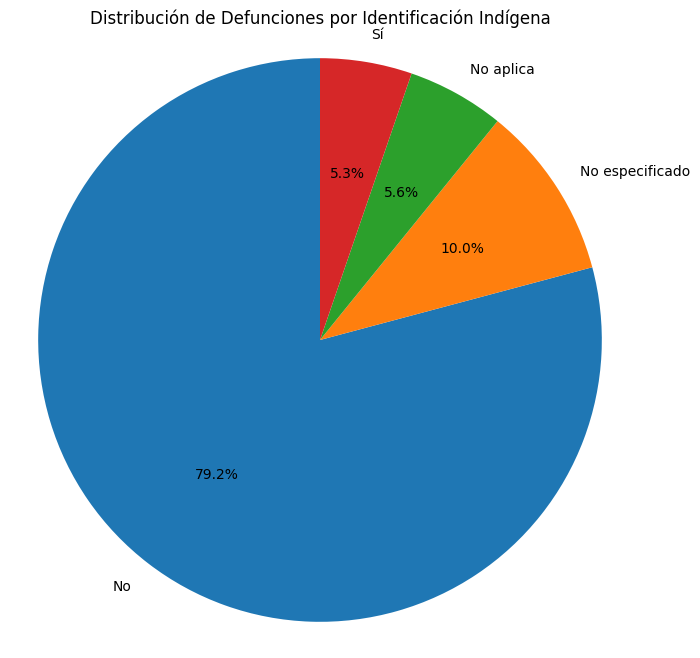

In [ ]:
# prompt: Hacer una grafica de pastel de la columna indigena

# Calculate the value counts for 'indigena'
indigena_counts = df['indigena'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(indigena_counts, labels=indigena_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Defunciones por Identificación Indígena')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# prompt: Crear una columna llamada derechohabiencia, basada en la columna derechohab, con los valores:
# 1 = 'Ninguna'
# 2 = 'IMSS'
# 3 = 'ISSSTE'
# 4 = 'PEMEX'
# 5 = 'SEDENA'
# 6 = 'SEMAR'
# 7 = 'Seguro Popular'
# 8 = 'Otra'
# 9 = 'IMSS Bienestar'
# 10 = 'ISSFAM'
# 99 = 'No especificada'

# Create the mapping dictionary
derechohabiencia_mapping = {
    1: 'Ninguna',
    2: 'IMSS',
    3: 'ISSSTE',
    4: 'PEMEX',
    5: 'SEDENA',
    6: 'SEMAR',
    7: 'Seguro Popular',
    8: 'Otra',
    9: 'IMSS Bienestar',
    10: 'ISSFAM',
    99: 'No especificada'
}

# Use the map function to create the new column, handling potential errors
df['derechohabiencia'] = df['derechohab'].map(derechohabiencia_mapping).fillna('No especificado')

# Display the first few rows to verify the new column
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,sexo_texto,codigo,entidad,codigo_ocurr,entidad_ocurr,area_ur_texto,mes_ocurr_espanol,afromexicano,indigena,derechohabiencia
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,Hombre,1,Aguascalientes,1,Aguascalientes,Rural,Marzo,No,No,IMSS
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,Mujer,1,Aguascalientes,1,Aguascalientes,Rural,Enero,No,No,Ninguna
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,Hombre,1,Aguascalientes,1,Aguascalientes,Urbana,Enero,No,No,Ninguna
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,Mujer,1,Aguascalientes,1,Aguascalientes,Urbana,Febrero,No,No,ISSSTE
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,Hombre,1,Aguascalientes,1,Aguascalientes,Urbana,Marzo,No,No,Ninguna


In [ ]:
# prompt: Generar una nueva columna llamada 'actividad_economica' basada en la columna 'cond_act' usando los valores: 1 = 'Si', 2 = 'No', 3 = 'No aplica' y 4 = 'No especificado'

# Create the mapping dictionary
actividad_economica_mapping = {1: 'Sí', 2: 'No', 3: 'No aplica', 4: 'No especificado'}

# Use the map function to create the new column, handling potential errors
df['actividad_economica'] = df['cond_act'].map(actividad_economica_mapping).fillna('No especificado')

# Display the first few rows to verify the new column
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,codigo,entidad,codigo_ocurr,entidad_ocurr,area_ur_texto,mes_ocurr_espanol,afromexicano,indigena,derechohabiencia,actividad_economica
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,1,Aguascalientes,1,Aguascalientes,Rural,Marzo,No,No,IMSS,Sí
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,1,Aguascalientes,1,Aguascalientes,Rural,Enero,No,No,Ninguna,Sí
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,1,Aguascalientes,1,Aguascalientes,Urbana,Enero,No,No,Ninguna,Sí
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,1,Aguascalientes,1,Aguascalientes,Urbana,Febrero,No,No,ISSSTE,Sí
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,1,Aguascalientes,1,Aguascalientes,Urbana,Marzo,No,No,Ninguna,Sí


In [ ]:
# prompt: Generar una nueva columna llamada 'estado_civil' basada en la columna 'edo_civil' con los siguientes valores:
# 1 = Soltero
# 2 = Divorciado
# 3 = Viudo
# 4 = Union Libre
# 5 = Casado
# 6 = Separado
# 8 = No aplica
# 9 = No especificado

# Create the mapping dictionary
estado_civil_mapping = {
    1: 'Soltero',
    2: 'Divorciado',
    3: 'Viudo',
    4: 'Unión Libre',
    5: 'Casado',
    6: 'Separado',
    8: 'No aplica',
    9: 'No especificado'
}

# Use the map function to create the new column, handling potential errors
df['estado_civil'] = df['edo_civil'].map(estado_civil_mapping).fillna('No especificado')

# Display the first few rows to verify the new column
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,entidad,codigo_ocurr,entidad_ocurr,area_ur_texto,mes_ocurr_espanol,afromexicano,indigena,derechohabiencia,actividad_economica,estado_civil
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,Aguascalientes,1,Aguascalientes,Rural,Marzo,No,No,IMSS,Sí,Soltero
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,Aguascalientes,1,Aguascalientes,Rural,Enero,No,No,Ninguna,Sí,Soltero
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,Aguascalientes,1,Aguascalientes,Urbana,Enero,No,No,Ninguna,Sí,Soltero
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,Aguascalientes,1,Aguascalientes,Urbana,Febrero,No,No,ISSSTE,Sí,Divorciado
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,Aguascalientes,1,Aguascalientes,Urbana,Marzo,No,No,Ninguna,Sí,Soltero


In [ ]:
# prompt: Generar una nueva columna llamada 'escolaridad' basada en la columna 'escolarida' con los siguientes valores:
# 1 = Sin escolaridad
# 2 = Preescolar
# 3 = Primaria incompleta
# 4 = Primaria completa
# 5 = Secundaria incompleta
# 6 = Secundaria completa
# 7 = Preparatoria incompleta
# 8 = Preparatoria completa
# 9 = Profesional
# 10 = Posgrado
# 88 = No aplica
# 99 = No especificado

# Create the mapping dictionary
escolaridad_mapping = {
    1: 'Sin escolaridad',
    2: 'Preescolar',
    3: 'Primaria incompleta',
    4: 'Primaria completa',
    5: 'Secundaria incompleta',
    6: 'Secundaria completa',
    7: 'Preparatoria incompleta',
    8: 'Preparatoria completa',
    9: 'Profesional',
    10: 'Posgrado',
    88: 'No aplica',
    99: 'No especificado'
}

# Use the map function to create the new column 'escolaridad', handling potential errors
df['escolaridad'] = df['escolarida'].map(escolaridad_mapping).fillna('No especificado')

# Display the first few rows to verify the new column
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,codigo_ocurr,entidad_ocurr,area_ur_texto,mes_ocurr_espanol,afromexicano,indigena,derechohabiencia,actividad_economica,estado_civil,escolaridad
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,1,Aguascalientes,Rural,Marzo,No,No,IMSS,Sí,Soltero,Secundaria completa
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,1,Aguascalientes,Rural,Enero,No,No,Ninguna,Sí,Soltero,Secundaria completa
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,1,Aguascalientes,Urbana,Enero,No,No,Ninguna,Sí,Soltero,Primaria incompleta
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,1,Aguascalientes,Urbana,Febrero,No,No,ISSSTE,Sí,Divorciado,Posgrado
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,1,Aguascalientes,Urbana,Marzo,No,No,Ninguna,Sí,Soltero,Secundaria completa


In [ ]:
# prompt: Generar una nueva columna llamada 'sitio_ocurrencia' basada en la columna 'sitio_ocur' con los siguientes valores:
# 1 = Secretaria de Salud
# 2 = IMSS Bienestar
# 3 = IMSS
# 4 = ISSSTE
# 5 = PEMEX
# 6 = SEDENA
# 7 = SEMAR
# 8 = Otra unidad publica
# 9 = Unidad medica privada
# 10 = Via publica
# 11 = Hogar
# 12 = Otro lugar
# 99 = No especificado

# Create the mapping dictionary
sitio_ocurrencia_mapping = {
    1: 'Secretaría de Salud',
    2: 'IMSS Bienestar',
    3: 'IMSS',
    4: 'ISSSTE',
    5: 'PEMEX',
    6: 'SEDENA',
    7: 'SEMAR',
    8: 'Otra unidad pública',
    9: 'Unidad medica privada',
    10: 'Vía pública',
    11: 'Hogar',
    12: 'Otro lugar',
    99: 'No especificado'
}

# Use the map function to create the new column 'sitio_ocurrencia', handling potential errors
df['sitio_ocurrencia'] = df['sitio_ocur'].map(sitio_ocurrencia_mapping).fillna('No especificado')

# Display the first few rows to verify the new column
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,entidad_ocurr,area_ur_texto,mes_ocurr_espanol,afromexicano,indigena,derechohabiencia,actividad_economica,estado_civil,escolaridad,sitio_ocurrencia
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,Aguascalientes,Rural,Marzo,No,No,IMSS,Sí,Soltero,Secundaria completa,Otro lugar
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,Aguascalientes,Rural,Enero,No,No,Ninguna,Sí,Soltero,Secundaria completa,Secretaría de Salud
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,Aguascalientes,Urbana,Enero,No,No,Ninguna,Sí,Soltero,Primaria incompleta,Hogar
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,Aguascalientes,Urbana,Febrero,No,No,ISSSTE,Sí,Divorciado,Posgrado,Hogar
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,Aguascalientes,Urbana,Marzo,No,No,Ninguna,Sí,Soltero,Secundaria completa,Hogar


In [ ]:
# prompt: Crear una nueva columna 'causa_defuncion' y una llamada 'lugar_defuncion' basado en el documento 'catalogos/causa_defuncion_filtrado.csv' y el campo 'causa_def'. Apuntando 'causa_def' a la columna CVE, 'causa_defuncion' a la columna 'DESCRIP' y 'lugar_defuncion' a la columna 'LUGAR'

# Load the causa_defuncion catalog
causa_defuncion_catalog = pd.read_csv('/content/catalogos/causa_defuncion_filtrado.csv')

# Merge the catalogs with the main dataframe
df = pd.merge(df, causa_defuncion_catalog, left_on='causa_def', right_on='CVE', how='left', suffixes=('', '_causa'))

# Rename columns
df = df.rename(columns={'DESCRIP': 'causa_defuncion', 'LUGAR': 'lugar_defuncion'})

# Display the first few rows to verify the new columns
df.head()


,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,afromexicano,indigena,derechohabiencia,actividad_economica,estado_civil,escolaridad,sitio_ocurrencia,CVE,causa_defuncion,lugar_defuncion
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,No,No,IMSS,Sí,Soltero,Secundaria completa,Otro lugar,X709,Ahorcamiento,No especificado
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,No,No,Ninguna,Sí,Soltero,Secundaria completa,Secretaría de Salud,X709,Ahorcamiento,No especificado
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,No,No,Ninguna,Sí,Soltero,Primaria incompleta,Hogar,X700,Ahorcamiento,Vivienda
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,No,No,ISSSTE,Sí,Divorciado,Posgrado,Hogar,X700,Ahorcamiento,Vivienda
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,No,No,Ninguna,Sí,Soltero,Secundaria completa,Hogar,X700,Ahorcamiento,Vivienda


In [ ]:
# prompt: Crear una nueva columna 'causa_defuncion' basado en el documento 'causa_defuncion.CSV' y el campo 'causa_def'. Apuntando 'causa_def' a la columna CVE y 'causa_defuncion' a la columna 'DESCRIP'

# Load the 'causa_defuncion.CSV' file
codigo_adicional_df = pd.read_csv('/content/catalogos/codigo_adicional.csv')

# Merge the dataframes based on 'causa_def' and 'CVE'
df = pd.merge(df, codigo_adicional_df, left_on='cod_adicio', right_on='CVE', how='left')

# Rename the 'DESCRIP' column to 'causa_defuncion'
df.rename(columns={'DESCRIP': 'codigo_adicional'}, inplace=True)

# Display the first few rows to verify the new column
df.head()

,ent_resid,ent_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,...,derechohabiencia,actividad_economica,estado_civil,escolaridad,sitio_ocurrencia,CVE_x,causa_defuncion,lugar_defuncion,CVE_y,codigo_adicional
0,1,1,X709,T71X,1,2,2,26.0,3,1,...,IMSS,Sí,Soltero,Secundaria completa,Otro lugar,X709,Ahorcamiento,No especificado,T71X,Asfixia
1,1,1,X709,T71X,2,2,2,30.0,1,1,...,Ninguna,Sí,Soltero,Secundaria completa,Secretaría de Salud,X709,Ahorcamiento,No especificado,T71X,Asfixia
2,1,1,X700,T71X,1,2,2,15.0,1,1,...,Ninguna,Sí,Soltero,Primaria incompleta,Hogar,X700,Ahorcamiento,Vivienda,T71X,Asfixia
3,1,1,X700,T71X,2,2,2,34.0,2,1,...,ISSSTE,Sí,Divorciado,Posgrado,Hogar,X700,Ahorcamiento,Vivienda,T71X,Asfixia
4,1,1,X700,T71X,1,2,2,22.0,3,1,...,Ninguna,Sí,Soltero,Secundaria completa,Hogar,X700,Ahorcamiento,Vivienda,T71X,Asfixia


In [ ]:
columnas_a_eliminar = ['ent_resid', 'ent_ocurr', 'Decada', 'codigo', 'codigo_ocurr', 'sexo', 'area_ur', 'afromex', 'conindig', 'mes_ocurr', 'derechohab', 'cond_act', 'edo_civil', 'escolarida', 'sitio_ocur', 'causa_def', 'cod_adicio', 'CVE_x', 'CVE_y']
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

In [ ]:
#Exportar el dataframe
df.to_csv('suicidios.csv', index=False)
